# Laboratorio 4
En este laboratorio se va a comparar el uso de CNN con ANN.

In [ ]:
#!pip install -r requirements.txt

In [11]:
import numpy as np
import tensorflow as ts
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Parte 1: Preparación del conjunto de datos

In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [6]:
print(type(x_train), type(y_train), type(x_test), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
def normalize_arrs(arr: np.ndarray) -> np.ndarray:
    return arr.astype("float32") / 255.0 


In [ ]:
# normalize between values of 0 and 1
x_train = normalize_arrs(x_train)
x_test = normalize_arrs(x_test)


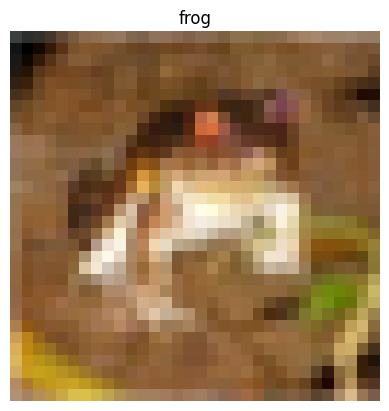

In [12]:
class_names:list[str] = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

plt.imshow(x_train[0])  # images are still in shape (32, 32, 3)
plt.title(class_names[y_train[0][0]])  # y_train has shape (50000, 1)
plt.axis("off")
plt.show()

## Modelo Base ANN 

In [16]:
model = ts.keras.Sequential([
    ts.keras.layers.Flatten(input_shape=(32,32,3)),
    ts.keras.layers.Dense(512, activation='relu'),
    ts.keras.layers.Dropout(0.3),
    ts.keras.layers.Dense(256, activation='relu'),
    ts.keras.layers.Dropout(0.3),
    ts.keras.layers.Dense(10, activation='softmax')
])

c:\Users\lpmon\Documents\GitHub\image-classifier-with-CNN\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile( optimizer=ts.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/15
352/352 - 3s - 9ms/step - accuracy: 0.2479 - loss: 2.0444 - val_accuracy: 0.3292 - val_loss: 1.8630
Epoch 2/15
352/352 - 2s - 7ms/step - accuracy: 0.3027 - loss: 1.9005 - val_accuracy: 0.3602 - val_loss: 1.8044
Epoch 3/15
352/352 - 2s - 6ms/step - accuracy: 0.3266 - loss: 1.8485 - val_accuracy: 0.3560 - val_loss: 1.7957
Epoch 4/15
352/352 - 2s - 5ms/step - accuracy: 0.3335 - loss: 1.8261 - val_accuracy: 0.3740 - val_loss: 1.7617
Epoch 5/15
352/352 - 2s - 5ms/step - accuracy: 0.3498 - loss: 1.7830 - val_accuracy: 0.3830 - val_loss: 1.7274
Epoch 6/15
352/352 - 2s - 6ms/step - accuracy: 0.3538 - loss: 1.7709 - val_accuracy: 0.3932 - val_loss: 1.7109
Epoch 7/15
352/352 - 2s - 6ms/step - accuracy: 0.3596 - loss: 1.7525 - val_accuracy: 0.3978 - val_loss: 1.6946
Epoch 8/15
352/352 - 3s - 7ms/step - accuracy: 0.3656 - loss: 1.7387 - val_accuracy: 0.3928 - val_loss: 1.7029
Epoch 9/15
352/352 - 3s - 9ms/step - accuracy: 0.3730 - loss: 1.7291 - val_accuracy: 0.4228 - val_loss: 1.6623
E

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.3f}")

Test accuracy: 0.424


Para este simple test podemos observar que el rendimiento de la ANN es bastante pobre a la hora de clasificar imágenes.

## Implementación de CNN